In [1]:
import os
import pickle
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.markers import MarkerStyle

plt.style.use('default')
plt.rcParams.update({"text.usetex": True,
    "font.family": "sans-serif",
    "axes.formatter.use_mathtext": True,
    "axes.formatter.limits": (-3, 3)
})

%matplotlib inline

In [2]:

files = os.listdir('../../output/match_population/match_population_non_spinning/injections')

file_indices_a, file_indices_b = [], []
for file in files:
    if file.endswith('.pkl') and 'GW Waveform A Meta Data' in file:
        index_start = file.find('GW Waveform A Meta Data') + len('GW Waveform A Meta Data ')
        index_end = file.find('.pkl')
        file_index = file[index_start:index_end]
        file_indices_a.append(int(file_index))
    if file.endswith('.pkl') and 'GW Waveform B Meta Data' in file:
        index_start = file.find('GW Waveform B Meta Data') + len('GW Waveform B Meta Data ')
        index_end = file.find('.pkl')
        file_index = file[index_start:index_end]
        file_indices_b.append(int(file_index))

N_sampl = len(file_indices_a)
waveform_metadata_a, waveform_metadata_b = [], []
indices = np.random.choice(file_indices_a, N_sampl, replace=False)

keys = ['mass_1_source', 'mass_ratio', 'a_1', 'a_2', 'redshift', 'cos_tilt_1', 'cos_tilt_2', 'phi_12', 'phi_jl', 'cos_theta_jn', 'ra', 'dec', 'psi', 'phase', 'incl', 'cos_theta_zn', 'mass_1', 'mass_2', 'luminosity_distance', 'tilt_1', 'tilt_2', 'theta_jn', 'theta_zn', 'geocent_time', 'snr_det']

data_a = {key: np.zeros(N_sampl) for key in keys}
data_b = {key: np.zeros(N_sampl) for key in keys}

for k in range(N_sampl):
    
    waveform_metadata_a.append(pickle.load(open('../../output/match_population/match_population_non_spinning/injections/GW Waveform A Meta Data %s.pkl' % indices[k], 'rb')))   # Importing Waveform Meta Data
    for key, val in waveform_metadata_a[k]['H1']['parameters'].items():   # Setting the variables
        if key in data_a:
            data_a[key][k] = val

    waveform_metadata_b.append(pickle.load(open('../../output/match_population/match_population_non_spinning/injections/GW Waveform B Meta Data %s.pkl' % indices[k], 'rb')))   # Importing Waveform Meta Data
    for key, val in waveform_metadata_b[k]['H1']['parameters'].items():   # Setting the variables
        if key in data_b:
            data_b[key][k] = val

mchirp_a, mchirp_b = np.power(data_a['mass_1']*data_a['mass_2'], (3/5))/np.power(data_a['mass_1']+data_a['mass_2'], (1/5)), np.power(data_b['mass_1']*data_b['mass_2'], (3/5))/np.power(data_b['mass_1']+data_b['mass_2'], (1/5))
eta_a, eta_b = (data_a['mass_1']*data_a['mass_2'])/np.power(data_a['mass_1']+data_a['mass_2'], 2), (data_b['mass_1']*data_b['mass_2'])/np.power(data_b['mass_1']+data_b['mass_2'], 2)

delta_tc = data_b['geocent_time'] - data_a['geocent_time']
snr_a, snr_b = data_a['snr_det'], data_b['snr_det']

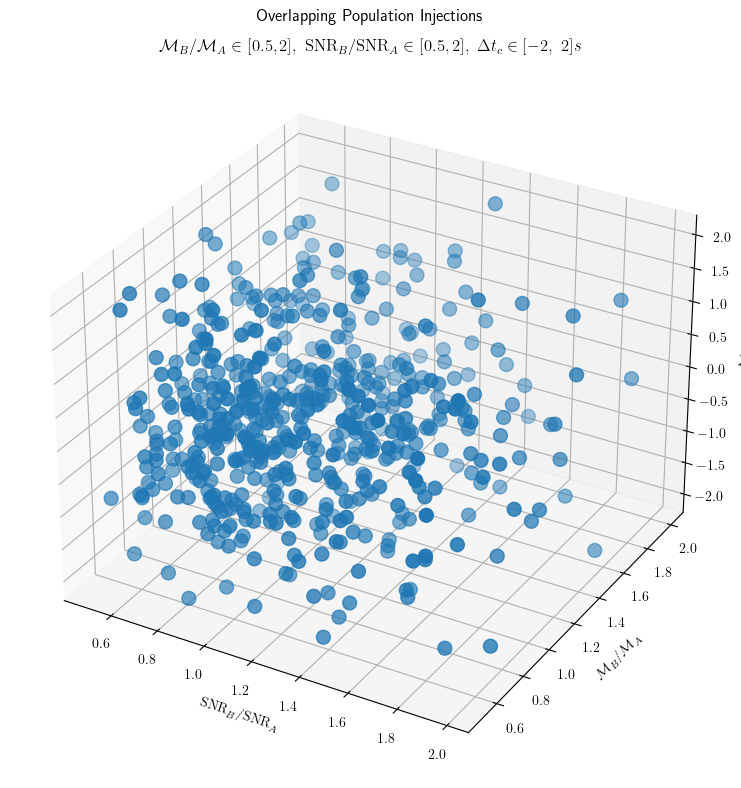

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': '3d'})
axes.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, s=100)
axes.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes.set_zlabel('$\Delta t_c$')
axes.ticklabel_format(useOffset=False, style='plain')
axes.set_title('$\\mathcal{M}_B/\\mathcal{M}_A\\in[0.5,2], \ \\mathrm{SNR}_B/\\mathrm{SNR}_A\\in[0.5,2], \ \\Delta t_c\\in[-2,\ 2]s$')
plt.suptitle('Overlapping Population Injections')
plt.tight_layout()
plt.savefig('../../output/match_population/match_population_non_spinning/INJECTIONS.png')
plt.show()

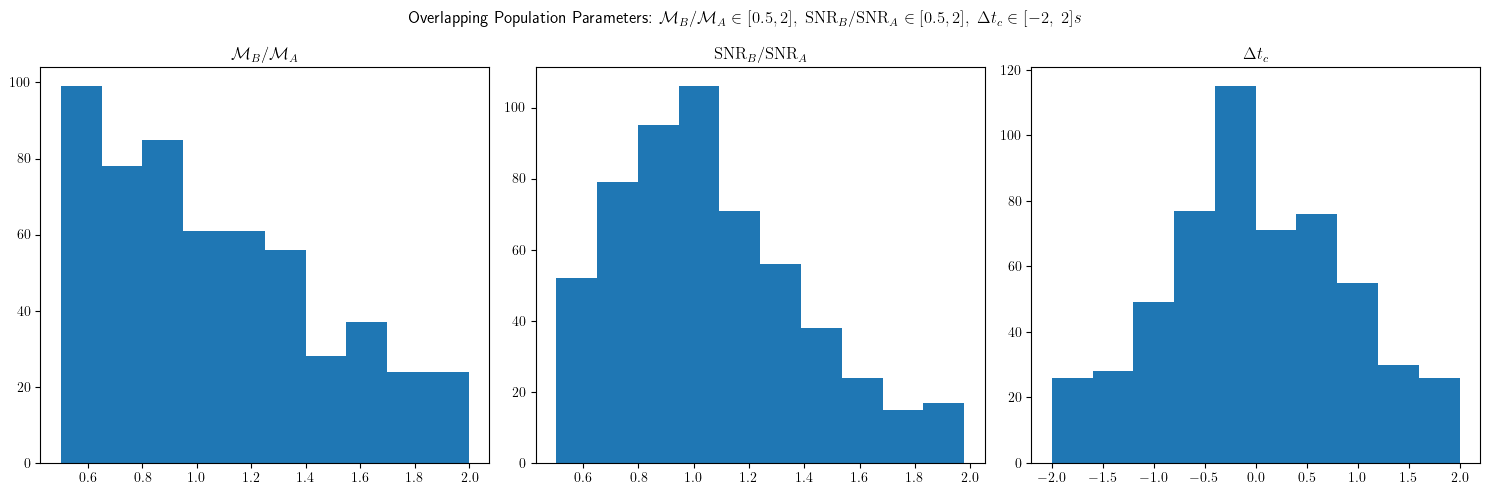

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(mchirp_b/mchirp_a)
axs[0].set_title('$\\mathcal{M}_B/\\mathcal{M}_A$')

axs[1].hist(snr_b/snr_a)
axs[1].set_title('$\\mathrm{SNR}_B/\\mathrm{SNR}_A$')

axs[2].hist(delta_tc)
axs[2].set_title('$\\Delta t_c$')

plt.suptitle('Overlapping Population Parameters: $\\mathcal{M}_B/\\mathcal{M}_A\\in[0.5,2], \ \\mathrm{SNR}_B/\\mathrm{SNR}_A\\in[0.5,2], \ \\Delta t_c\\in[-2,\ 2]s$')
plt.savefig('../../output/match_population/match_population_non_spinning/INJECTION_PARAMS.png')
fig.tight_layout()
plt.show()

In [5]:
data = np.loadtxt('../../output/match_population/match_population_non_spinning/outputs/output.csv', delimiter=',')
match_f_snr, mchirpf_snr, etaf_snr, mchirp_b, mchirp_a, snr_b, snr_a, delta_tc = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4], data[:,5], data[:,6], data[:,7]

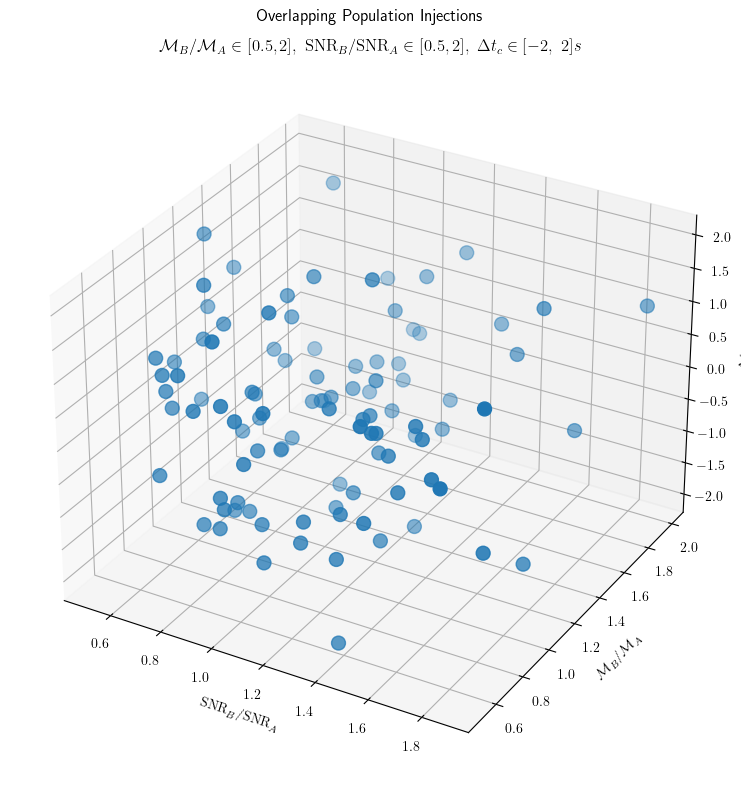

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8), subplot_kw={'projection': '3d'})
axes.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, s=100)
axes.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes.set_zlabel('$\Delta t_c$')
axes.ticklabel_format(useOffset=False, style='plain')
axes.set_title('$\\mathcal{M}_B/\\mathcal{M}_A\\in[0.5,2], \ \\mathrm{SNR}_B/\\mathrm{SNR}_A\\in[0.5,2], \ \\Delta t_c\\in[-2,\ 2]s$')
plt.suptitle('Overlapping Population Injections')
plt.tight_layout()
plt.savefig('../../output/match_population/match_population_non_spinning/outputs/INJECTIONS.png')
plt.show()

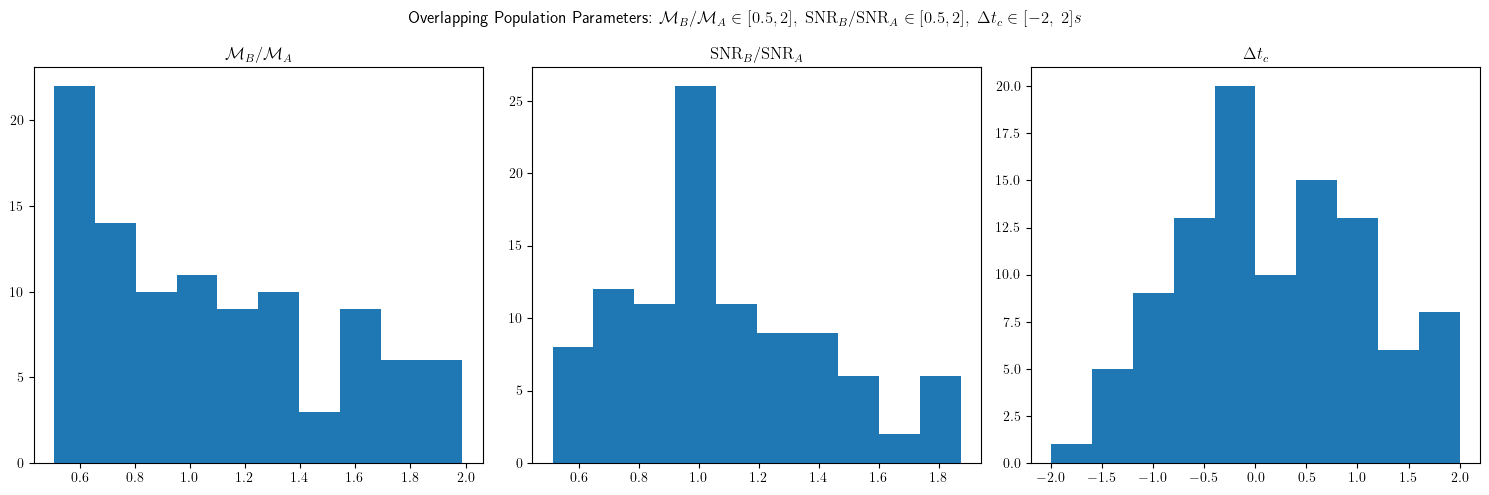

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(mchirp_b/mchirp_a)
axs[0].set_title('$\\mathcal{M}_B/\\mathcal{M}_A$')

axs[1].hist(snr_b/snr_a)
axs[1].set_title('$\\mathrm{SNR}_B/\\mathrm{SNR}_A$')

axs[2].hist(delta_tc)
axs[2].set_title('$\\Delta t_c$')

plt.suptitle('Overlapping Population Parameters: $\\mathcal{M}_B/\\mathcal{M}_A\\in[0.5,2], \ \\mathrm{SNR}_B/\\mathrm{SNR}_A\\in[0.5,2], \ \\Delta t_c\\in[-2,\ 2]s$')
plt.savefig('../../output/match_population/match_population_non_spinning/outputs/INJECTION_PARAMS.png')
fig.tight_layout()
plt.show()

#### Recovered Chirp Mass $\mathcal{M}$

In [8]:
bias_mchirp = np.abs(mchirpf_snr-mchirp_a)/mchirp_a*100
bias_mchirp_b = np.abs(mchirpf_snr-mchirp_b)/mchirp_b*100

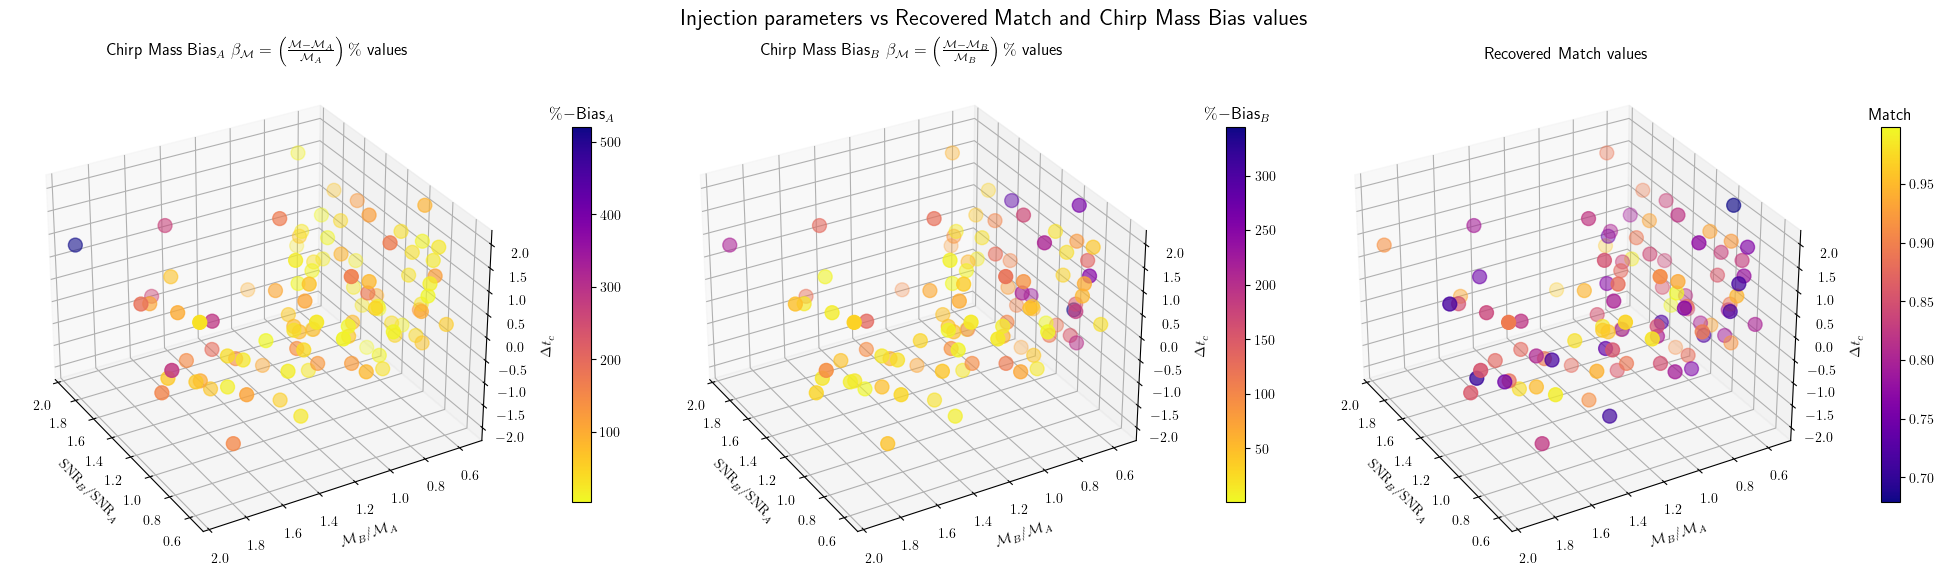

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, edgecolor=None, cmap='plasma_r', s=100)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_xlim(0.5,2)
axes[0].set_ylim(0.5,2)
axes[0].set_title('Chirp Mass Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150

scatter2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, edgecolor=None, cmap='plasma_r', s=100)
clb2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.7, pad=0.1)
clb2.ax.set_title('$\\%-$Bias$_B$')

axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_xlim(0.5,2)
axes[1].set_ylim(0.5,2)
axes[1].set_title('Chirp Mass Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150

scatter3 = axes[2].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, edgecolor=None, cmap='plasma', s=100)
clb3 = fig.colorbar(scatter3, ax=axes[2], shrink=0.7, pad=0.1)
clb3.ax.set_title('Match')

axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2].set_zlabel('$\Delta t_c$')
axes[2].set_xlim(0.5,2)
axes[2].set_ylim(0.5,2)
axes[2].set_title('Recovered Match values', loc='center')
axes[2].ticklabel_format(useOffset=False, style='plain')
axes[2].azim = 150

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Bias values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/match_population/match_population_non_spinning/BIAS_MCHIRP(3D).png')
plt.show()

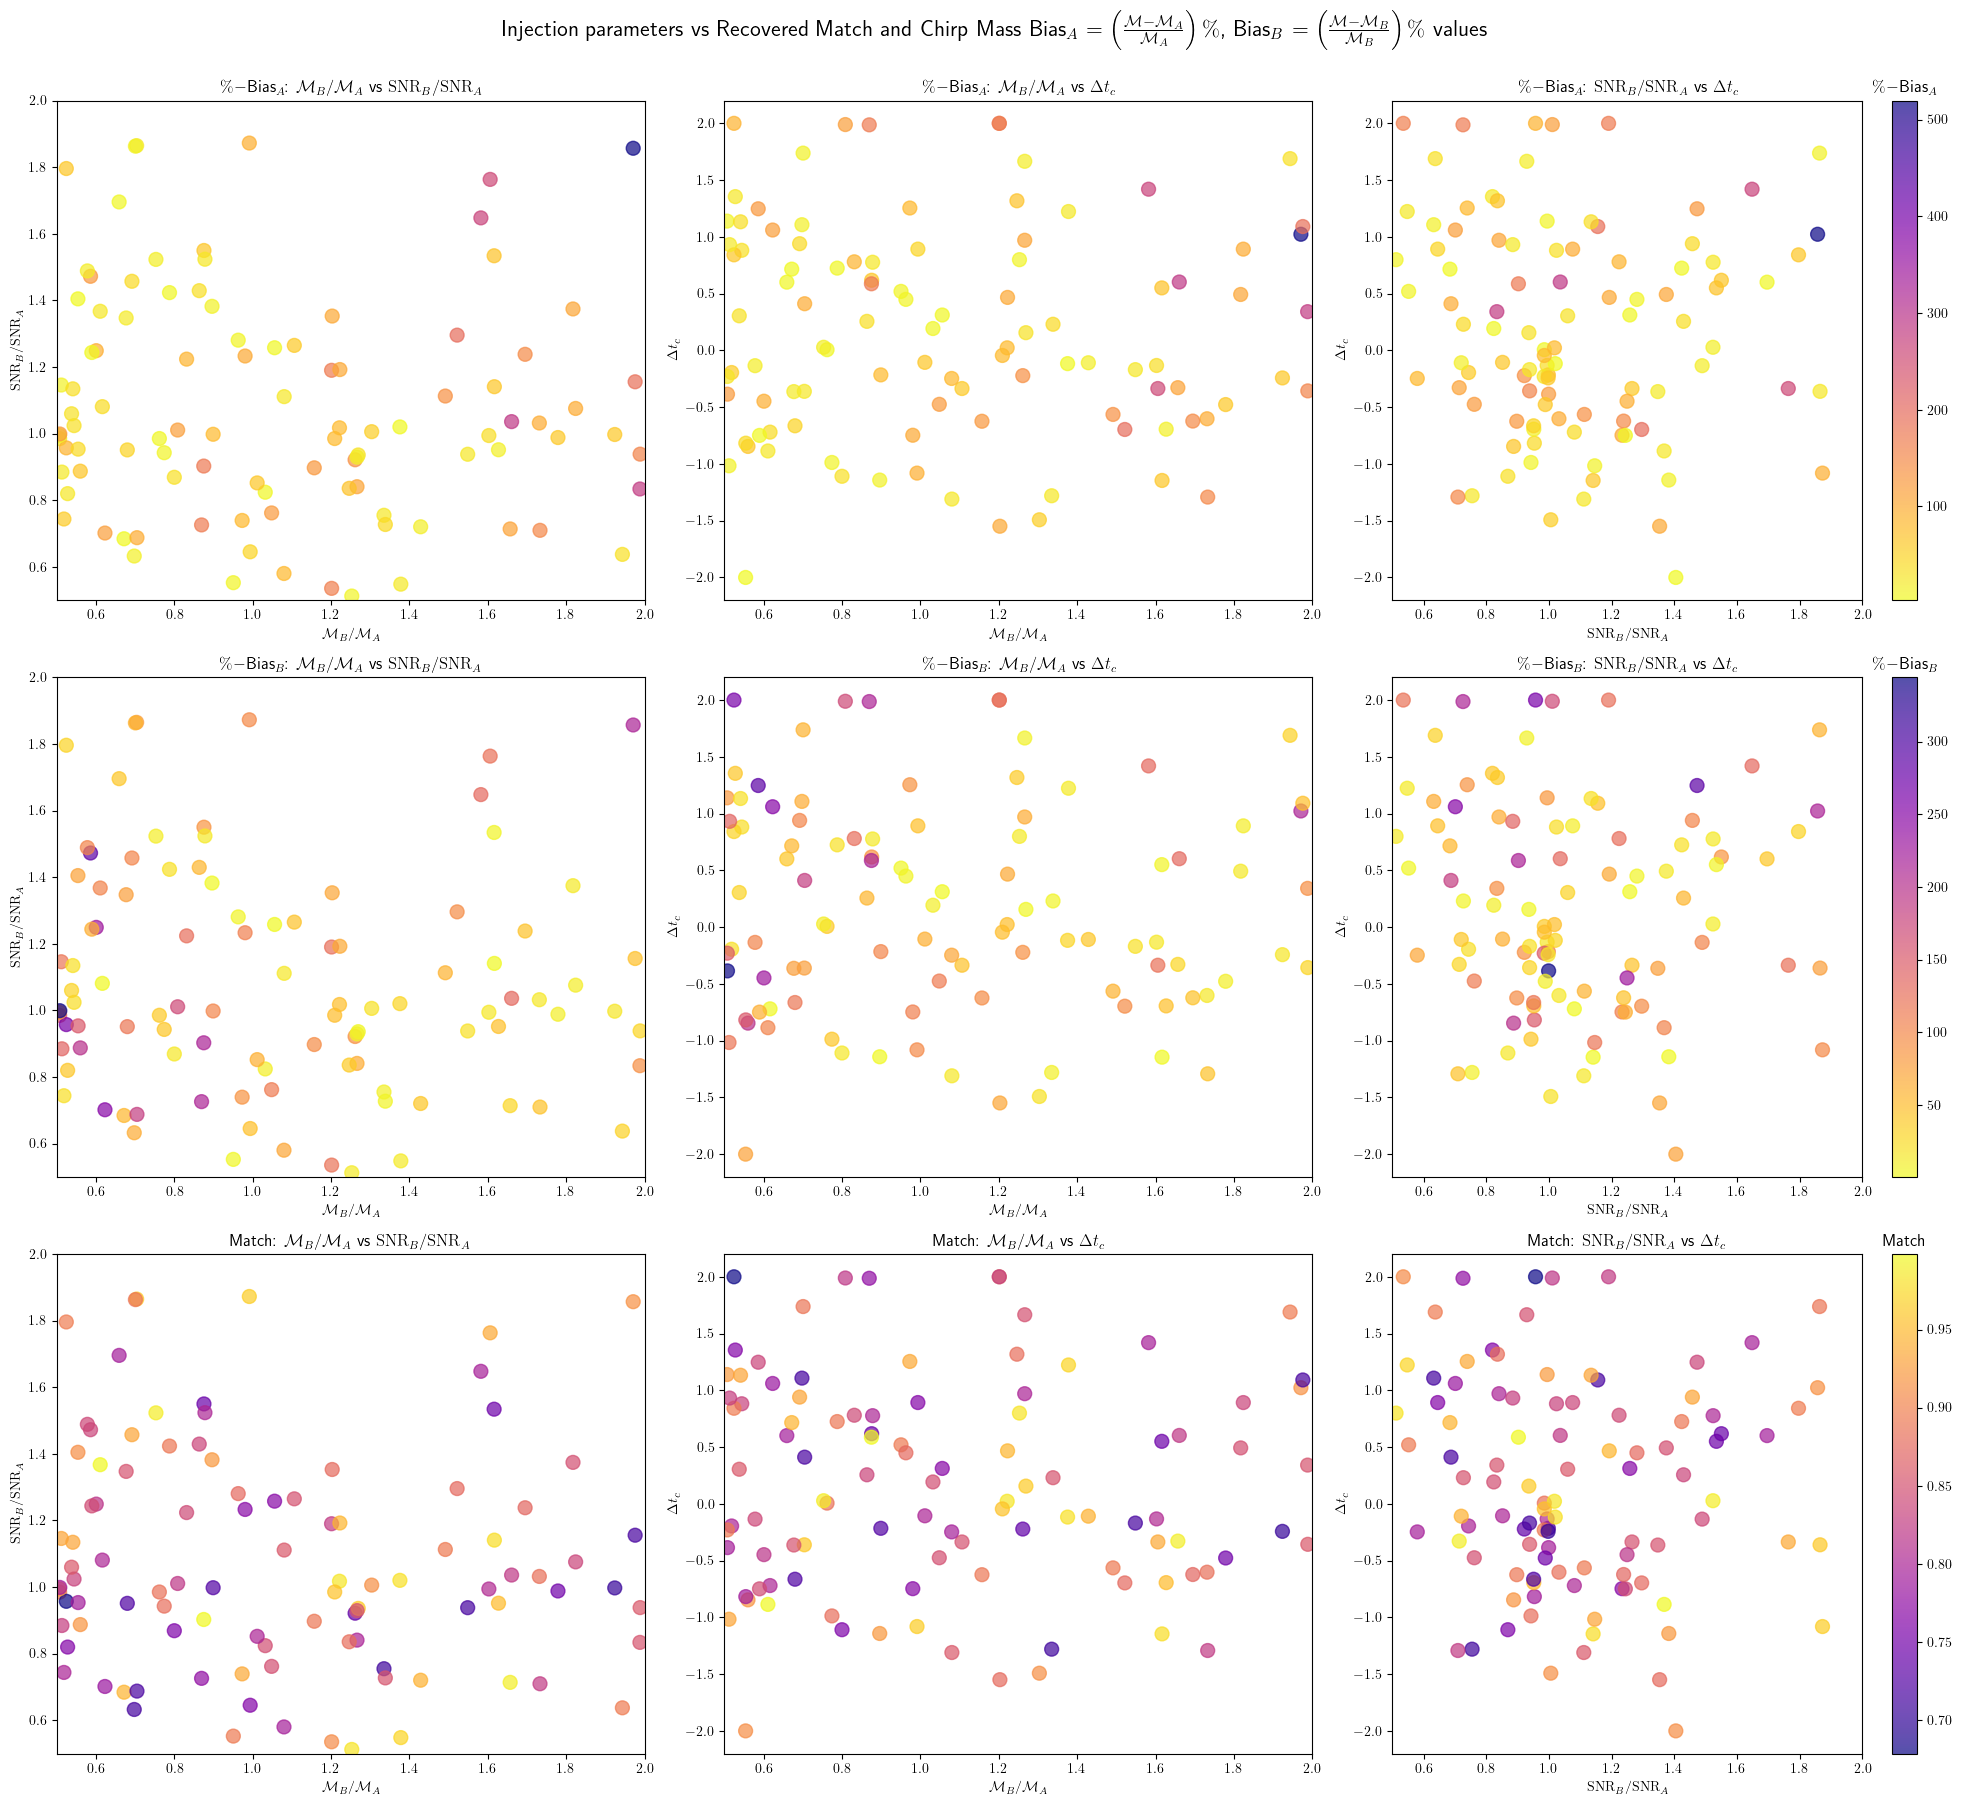

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

scatter11 = axes[0,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp, cmap='plasma_r',s=100, alpha=0.7)
axes[0,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,0].set_xlim(0.5,2)
axes[0,0].set_ylim(0.5,2)
axes[0,0].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter12 = axes[1,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,0].set_xlim(0.5,2)
axes[1,0].set_ylim(0.5,2)
axes[1,0].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter13 = axes[2,0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,0].set_xlim(0.5,2)
axes[2,0].set_ylim(0.5,2)
axes[2,0].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\mathrm{SNR}_B/\mathrm{SNR}_A$')

scatter21 = axes[0,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=100, alpha=0.7)
axes[0,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0,1].set_ylabel('$\Delta t_c$')
axes[0,1].set_xlim(0.5,2)
axes[0,1].set_title('$\\%-$Bias$_A$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter22 = axes[1,1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
axes[1,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1,1].set_ylabel('$\Delta t_c$')
axes[1,1].set_xlim(0.5,2)
axes[1,1].set_title('$\\%-$Bias$_B$: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter32 = axes[2,1].scatter(mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
axes[2,1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[2,1].set_ylabel('$\Delta t_c$')
axes[2,1].set_xlim(0.5,2)
axes[2,1].set_title('Match: $\mathcal{M}_B/\mathcal{M}_A$ vs $\Delta t_c$')

scatter31 = axes[0,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=100, alpha=0.7)
clb5 = plt.colorbar(scatter31)
clb5.ax.set_title('$\\%-$Bias$_A$')
axes[0,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0,2].set_ylabel('$\Delta t_c$')
axes[0,2].set_xlim(0.5,2)
axes[0,2].set_title('$\\%-$Bias$_A$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter32 = axes[1,2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_b, cmap='plasma_r', s=100, alpha=0.7)
clb6 = plt.colorbar(scatter32)
clb6.ax.set_title('$\\%-$Bias$_B$')
axes[1,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1,2].set_ylabel('$\Delta t_c$')
axes[1,2].set_xlim(0.5,2)
axes[1,2].set_title('$\\%-$Bias$_B$: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

scatter33 = axes[2,2].scatter(snr_b/snr_a, delta_tc, c=match_f_snr, cmap='plasma', s=100, alpha=0.7)
clb7 = plt.colorbar(scatter33)
clb7.ax.set_title('Match')
axes[2,2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2,2].set_ylabel('$\Delta t_c$')
axes[2,2].set_xlim(0.5,2)
axes[2,2].set_title('Match: $\mathrm{SNR}_B/\mathrm{SNR}_A$ vs $\Delta t_c$')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Bias$_A$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$, Bias$_B$ $=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold', y=1)
plt.tight_layout()
plt.savefig('../../output/match_population/match_population_non_spinning/BIAS_MCHIRP(2D).png')
plt.show()

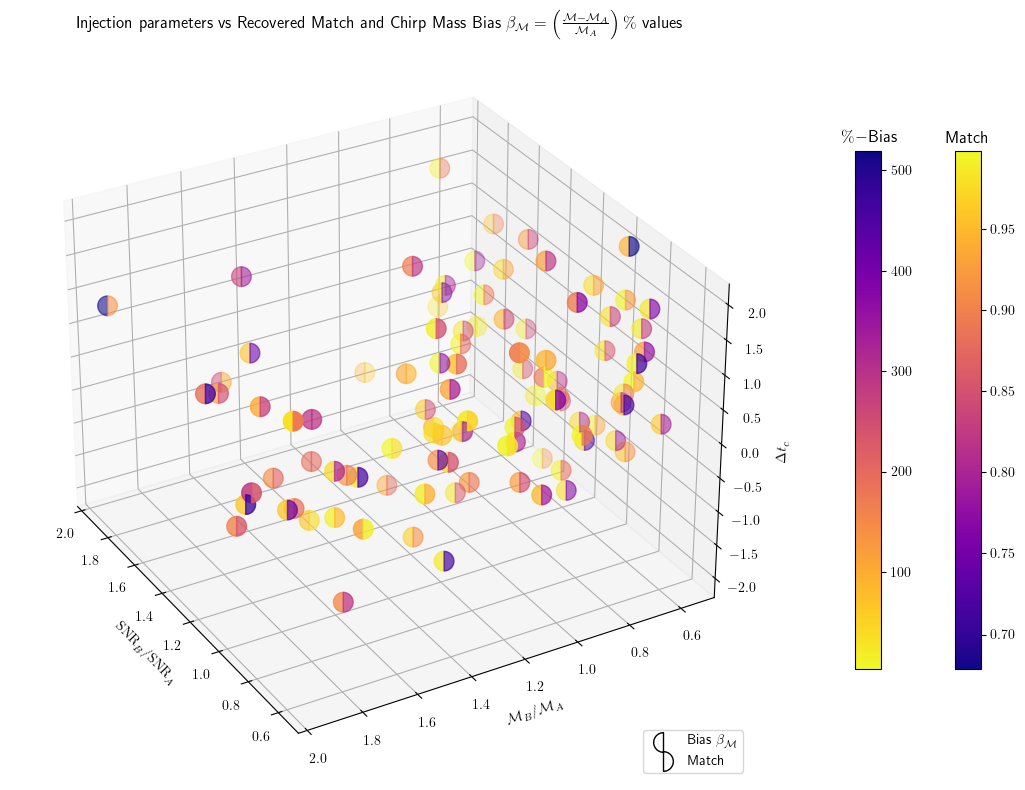

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax1 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=ax, shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('Match')

clb1 = plt.colorbar(ax1, ax=ax, shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias $\\beta_{\\mathcal{M}}$', 'Match']
ax.legend(key_handles, key_labels, loc='lower right')

ax.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
ax.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
ax.set_zlabel('$\Delta t_c$')
ax.set_xlim(0.5,2)
ax.set_ylim(0.5,2)
ax.set_title('Injection parameters vs Recovered Match and Chirp Mass Bias $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ values', loc='center')
ax.ticklabel_format(useOffset=False, style='plain')
ax.azim = 150

plt.tight_layout()
plt.show()

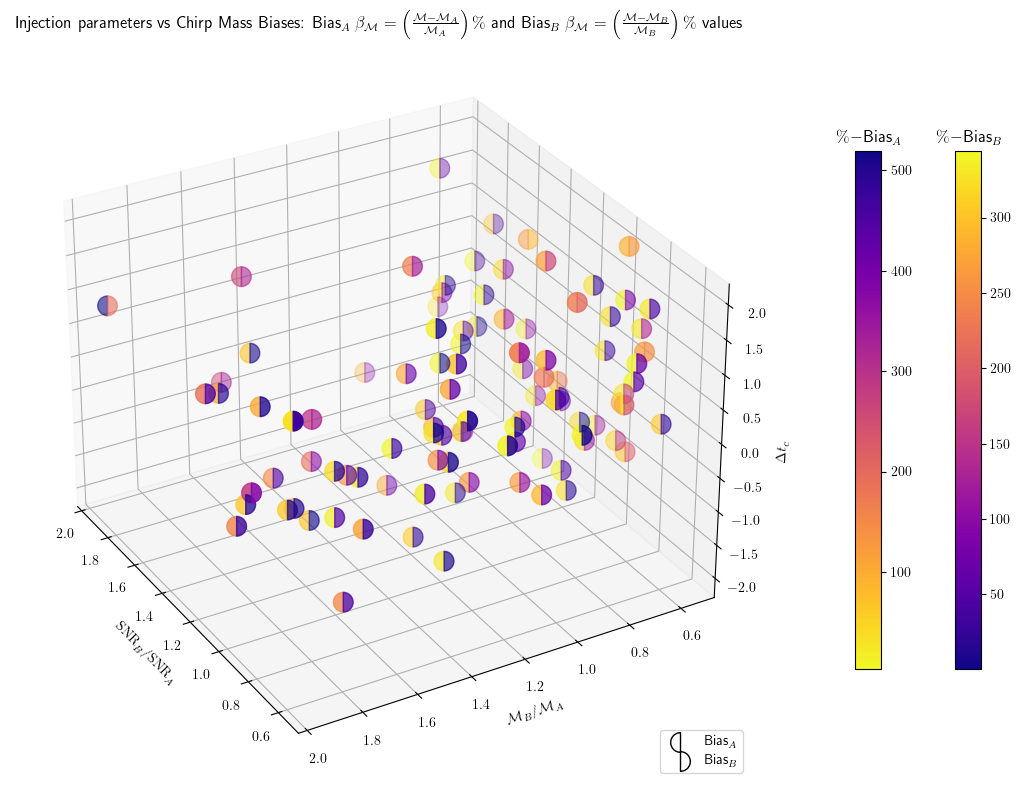

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax1 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = ax.scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=ax, shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('$\\%-$Bias$_B$')

clb1 = plt.colorbar(ax1, ax=ax, shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias$_A$', 'Bias$_B$']
ax.legend(key_handles, key_labels, loc='lower right')

ax.set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
ax.set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
ax.set_zlabel('$\Delta t_c$')
ax.set_xlim(0.5,2)
ax.set_ylim(0.5,2)
ax.set_title('Injection parameters vs Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')
ax.ticklabel_format(useOffset=False, style='plain')
ax.azim = 150

plt.tight_layout()
plt.show()

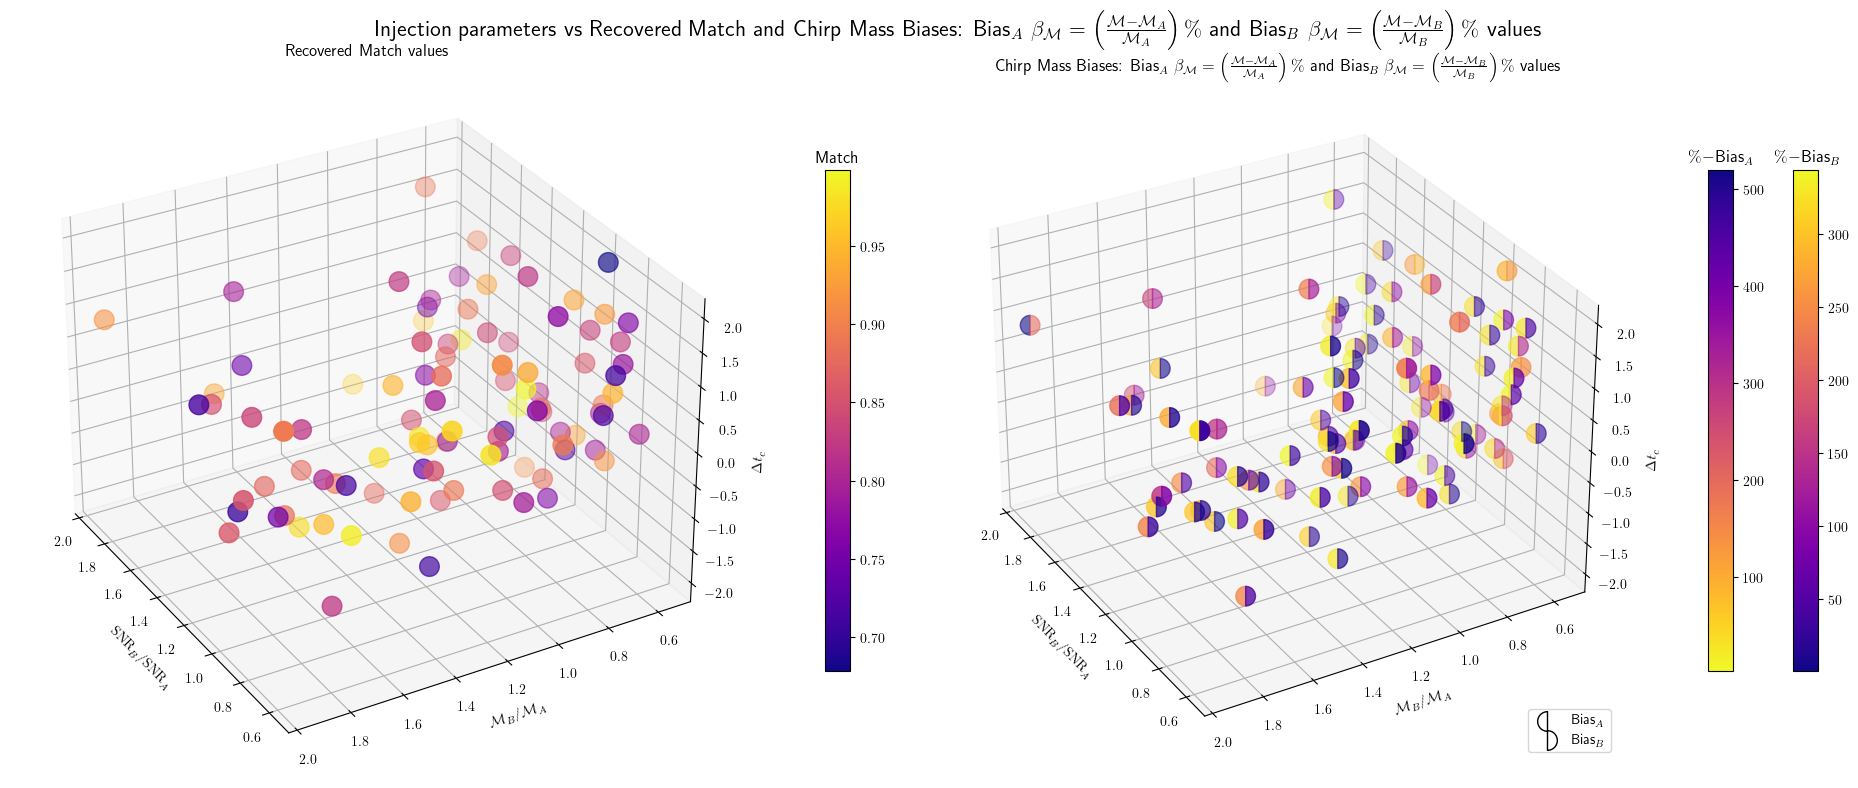

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': '3d'})

scatter1 = axes[0].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=match_f_snr, edgecolor=None, cmap='plasma', s=200)
clb1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.7, pad=0.1)
clb1.ax.set_title('Match')

axes[0].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_zlabel('$\Delta t_c$')
axes[0].set_xlim(0.5,2)
axes[0].set_ylim(0.5,2)
axes[0].ticklabel_format(useOffset=False, style='plain')
axes[0].azim = 150
axes[0].set_title('Recovered Match values', loc='center')

ax1 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', s=200, marker=MarkerStyle("o", fillstyle="left"))
ax2 = axes[1].scatter(snr_b/snr_a, mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma', s=200, marker=MarkerStyle("o", fillstyle="right"))

clb2 = plt.colorbar(ax2, ax=axes[1], shrink=0.7, norm=None, pad=-0.05)
clb2.ax.set_title('$\\%-$Bias$_B$')

clb1 = plt.colorbar(ax1, ax=axes[1], shrink=0.7, norm=None, pad=0.1)
clb1.ax.set_title('$\\%-$Bias$_A$')

key_handles = [
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left"), s=200),
    ax.scatter([], [], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"), s=200)
]
key_labels = ['Bias$_A$', 'Bias$_B$']
axes[1].legend(key_handles, key_labels, loc='lower right')

axes[1].set_ylabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[1].set_zlabel('$\Delta t_c$')
axes[1].set_xlim(0.5,2)
axes[1].set_ylim(0.5,2)
axes[1].ticklabel_format(useOffset=False, style='plain')
axes[1].azim = 150
axes[1].set_title('Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', loc='center')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../../output/match_population/match_population_non_spinning/BIASES_MCHIRP(3D).png')
plt.show()

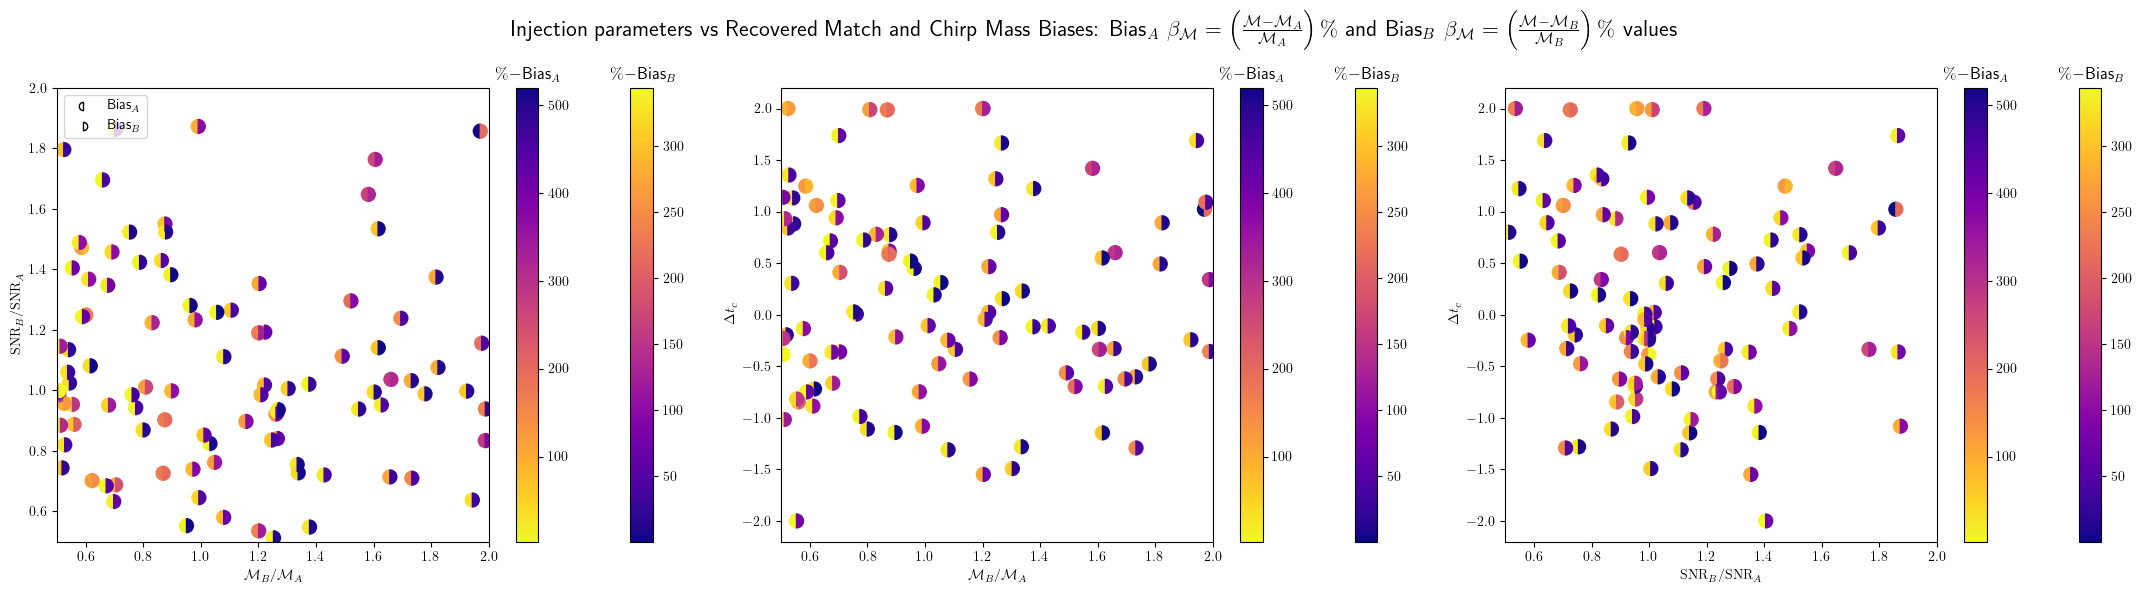

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

scatter11 = axes[0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=100)
scatter12 = axes[0].scatter(mchirp_b/mchirp_a, snr_b/snr_a, c=bias_mchirp_b, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=100)
axes[0].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[0].set_ylabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[0].set_xlim(0.5,2)
axes[0].set_ylim(0.5,2)

scatter21 = axes[1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=100)
scatter22 = axes[1].scatter(mchirp_b/mchirp_a, delta_tc, c=bias_mchirp_b, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=100)
axes[1].set_xlabel('$\mathcal{M}_B/\mathcal{M}_A$')
axes[1].set_ylabel('$\Delta t_c$')
axes[1].set_xlim(0.5,2)

scatter31 = axes[2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp, cmap='plasma_r', marker=MarkerStyle("o", fillstyle="left"), s=100)
scatter32 = axes[2].scatter(snr_b/snr_a, delta_tc, c=bias_mchirp_b, cmap='plasma', marker=MarkerStyle("o", fillstyle="right"), s=100)
axes[2].set_xlabel('$\mathrm{SNR}_B/\mathrm{SNR}_A$')
axes[2].set_ylabel('$\Delta t_c$')
axes[2].set_xlim(0.5,2)

clb2 = plt.colorbar(scatter12, ax=axes[0])
clb2.ax.set_title('$\\%-$Bias$_B$')
clb1 = plt.colorbar(scatter11, ax=axes[0])
clb1.ax.set_title('$\\%-$Bias$_A$')
clb4 = plt.colorbar(scatter22, ax=axes[1])
clb4.ax.set_title('$\\%-$Bias$_B$')
clb3 = plt.colorbar(scatter21, ax=axes[1])
clb3.ax.set_title('$\\%-$Bias$_A$')
clb6 = plt.colorbar(scatter32, ax=axes[2])
clb6.ax.set_title('$\\%-$Bias$_B$')
clb5 = plt.colorbar(scatter31, ax=axes[2])
clb5.ax.set_title('$\\%-$Bias$_A$')

fig.suptitle('Injection parameters vs Recovered Match and Chirp Mass Biases: Bias$_A$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_A}{\\mathcal{M}_A}\\right)\\%$ and Bias$_B$ $\\beta_{\\mathcal{M}}=\\left(\\frac{\\mathcal{M}-\\mathcal{M}_B}{\\mathcal{M}_B}\\right)\\%$ values', fontsize=16, fontweight='bold')

key_handles = [
    axes[0].scatter([], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="left")),
    axes[0].scatter([], [], c='white', edgecolor='black', marker=MarkerStyle("o", fillstyle="right"))
]
key_labels = ['Bias$_A$', 'Bias$_B$']
axes[0].legend(key_handles, key_labels, loc='upper left')

plt.tight_layout()
plt.show()